### Waves at boundaries

Define functions to calculate reflection and transmission coefficients.

_Note the equations used here are expressed in terms of the complex-valued refractive index (i.e. $\gamma = j\omega\mu/Z$ and $n = c\gamma/j\omega$; so $n = c\mu/Z$), and use complete expressions involving complex-valued angles of incidence and transmission - the lecture notes assume the correct complex angles for approximately lossless media._

In [1]:
import numpy as np
c = 2.99792458e8
mu_0 = 4*np.pi*1e-7
epsilon_0 = 1/(mu_0*c**2)

def fresnel_coefficients(f, theta_i, kappa_e1, kappa_m1, sigma_1, kappa_e2, kappa_m2, sigma_2):
    # find the refractive indicies and direction of propagation and attenuation
    n_1, _, phi_i, n_2, theta_t, phi_t = __angle_of_transmission(f, theta_i, kappa_e1, kappa_m1, sigma_1, \
                        kappa_e2, kappa_m2, sigma_2)
    
    # REFLECTION - PERPENDICULAR COMPONENT
    if n_1.real*np.sin(theta_i)/n_2.real < 1: # check if the angle of incidence is above/below the critical angle
        # BELOW CRITICAL ANGLE
        reflection_perp = (kappa_m2*(n_1.real*np.cos(theta_i) - 1j*n_1.imag*np.sin(phi_i)) - \
                       kappa_m1*(n_2.real*np.cos(theta_t) - 1j*n_2.imag*np.sin(phi_t))) / \
                      (kappa_m2*(n_1.real*np.cos(theta_i) - 1j*n_1.imag*np.sin(phi_i)) + \
                       kappa_m1*(n_2.real*np.cos(theta_t) - 1j*n_2.imag*np.sin(phi_t)))
    else:
        # ABOVE CRITICAL ANGLE
        reflection_perp = (kappa_m2*n_1.real*np.cos(theta_i) + 1j*(kappa_m1*n_2.imag*np.sin(phi_t) - \
                       kappa_m2*n_1.imag*np.sin(phi_i) + kappa_m1*np.sqrt(n_1.real**2*np.sin(theta_i)**2 - n_2.real**2))) / \
                          (kappa_m2*n_1.real*np.cos(theta_i) - 1j*(kappa_m1*n_2.imag*np.sin(phi_t) + \
                       kappa_m2*n_1.imag*np.sin(phi_i) + kappa_m1*np.sqrt(n_1.real**2*np.sin(theta_i)**2 - n_2.real**2)))      
    
    # REFLECTION - PARALLEL COMPONENT
    if n_1.real*np.sin(theta_i)/n_2.real < 1: # check if the angle of incidence is above/below the critical angle
        # BELOW CRITICAL ANGLE
        reflection_para = -(kappa_m1*(n_2.real*np.cos(theta_i) - 1j*n_2.imag*np.sin(phi_i)) - \
                       kappa_m2*(n_1.real*np.cos(theta_t) - 1j*n_1.imag*np.sin(phi_t))) / \
                      (kappa_m1*(n_2.real*np.cos(theta_i) - 1j*n_2.imag*np.sin(phi_i)) + \
                       kappa_m2*(n_1.real*np.cos(theta_t) - 1j*n_1.imag*np.sin(phi_t)))
    else:
        # ABOVE CRITICAL ANGLE
        reflection_para = -(kappa_m1*n_2.real*np.cos(theta_i) + 1j*(kappa_m2*n_1.imag*np.sin(phi_t) - \
                       kappa_m1*n_2.imag*np.sin(phi_i) + kappa_m2*np.sqrt(n_1.real**2*np.sin(theta_i)**2 - n_2.real**2))) / \
                          (kappa_m1*n_2.real*np.cos(theta_i) - 1j*(kappa_m2*n_1.imag*np.sin(phi_t) + \
                       kappa_m1*n_2.imag*np.sin(phi_i) + kappa_m2*np.sqrt(n_1.real**2*np.sin(theta_i)**2 - n_2.real**2)))      

    # TRANSMISSION - PERPENDICULAR COMPONENT
    if n_1.real*np.sin(theta_i)/n_2.real < 1: # check if the angle of incidence is above/below the critical angle
        # BELOW CRITICAL ANGLE
        transmission_perp = (2*kappa_m2*(n_1.real*np.cos(theta_i) - 1j*n_1.imag*np.sin(phi_i))) / \
                      (kappa_m2*(n_1.real*np.cos(theta_i) - 1j*n_1.imag*np.sin(phi_i)) + \
                       kappa_m1*(n_2.real*np.cos(theta_t) - 1j*n_2.imag*np.sin(phi_t)))
    else:
        # ABOVE CRITICAL ANGLE
        transmission_perp = (2*kappa_m2*(n_1.real*np.cos(theta_i) - 1j*n_1.imag*np.sin(phi_i))) / \
                      (kappa_m2*n_1.real*np.cos(theta_i) - 1j*(kappa_m1*n_2.imag*np.sin(phi_t) + \
                       kappa_m2*n_1.imag*np.sin(phi_i) + kappa_m1*np.sqrt(n_1.real**2*np.sin(theta_i)**2 - n_2.real**2)))      

    # TRANSMISSION - PARALLEL COMPONENT
    if n_1.real*np.sin(theta_i)/n_2.real < 1: # check if the angle of incidence is above/below the critical angle
        # BELOW CRITICAL ANGLE
        transmission_para = (2*kappa_m2*(n_1.real*np.cos(theta_i) - 1j*n_1.imag*np.sin(phi_i))) / \
                      (kappa_m1*(n_2.real*np.cos(theta_i) - 1j*n_2.imag*np.sin(phi_i)) + \
                       kappa_m2*(n_1.real*np.cos(theta_t) - 1j*n_1.imag*np.sin(phi_t)))
    else:
        # ABOVE CRITICAL ANGLE
        transmission_para = (2*kappa_m2*(n_1.real*np.cos(theta_i) - 1j*n_1.imag*np.sin(phi_i))) / \
                      (kappa_m1*n_2.real*np.cos(theta_i) - 1j*(kappa_m2*n_1.imag*np.sin(phi_t) + \
                       kappa_m1*n_2.imag*np.sin(phi_i) + kappa_m2*np.sqrt(n_1.real**2*np.sin(theta_i)**2 - n_2.real**2)))      

    return __cartesian_to_polar(reflection_perp), __cartesian_to_polar(reflection_para), \
                __cartesian_to_polar(transmission_perp), __cartesian_to_polar(transmission_para)

def __angle_of_transmission(f, theta_i, kappa_e1, kappa_m1, sigma_1, kappa_e2, kappa_m2, sigma_2):
    # calculate the complex-valued refractive indices for both media
    n_1 = __refractive_index(f, kappa_e1, kappa_m1, sigma_1)
    n_2 = __refractive_index(f, kappa_e2, kappa_m2, sigma_2)

    # calculate the imaginary-component of the angle of incidence assuming medium 1 is approximately homogeneous
    # i.e. surfaces of constant phase and constant amplitude line up
    phi_i = np.pi/2 - theta_i # note that phi is defined from boundary, not normal to boundary
    
    # calculate the angle of transmission using Snell's law
    if n_1.real*np.sin(theta_i)/n_2.real < 1: # check if the angle of incidence is above/below the critical angle
        theta_t = np.arcsin(n_1.real*np.sin(theta_i)/n_2.real)
    else:
        theta_t = np.pi/2
    # calculate the imaginary-component of the angle of transmission
    if n_1.imag == 0:
        phi_t = np.pi/2
    elif n_2.imag < 0 and n_1.imag*np.sin(theta_i)/n_2.imag < 1:
        phi_t = np.arccos(n_1.imag*np.sin(theta_i)/n_2.imag)
    else:
        return Exception('First medium cannot be significantly more lossy than second medium.')
    
    return n_1, theta_i, phi_i, n_2, theta_t, phi_t
    
def __cartesian_to_polar(z):
    # find amplitude
    amplitude = np.sqrt(z.real**2 + z.imag**2)
    # find phase
    phase = np.arctan(z.imag/z.real) % np.pi
    if z.imag < 0 or z.imag == 0 and np.sign(z.real) < 0:
        phase = phase - np.pi
    
    # return amplitude and phase
    return (amplitude, phase)

def __propagation_constant(f, kappa_e, kappa_m, sigma):
    # can consider L to find limiting cases; but no significant computational advantage
    return np.sqrt(-kappa_e*kappa_m*epsilon_0*mu_0*(2*np.pi*f)**2 + 1j*kappa_m*mu_0*sigma*(2*np.pi*f))

def __refractive_index(f, kappa_e, kappa_m, sigma):
    # find wavenumber of the wave in a vacuum
    k = 2*np.pi*f/c
    # divide propagation constant by the wavenumber to get the refractive index
    return __propagation_constant(f, kappa_e, kappa_m, sigma)/(1j*k)


In [4]:
fresnel_coefficients(1e8, np.pi/2, 2.5, 1, 0, 1, 1, 0)

((1.0, 3.141592653589793),
 (1.0, 0.0),
 (1.581012219361306e-16, 1.5707963267948966),
 (1.581012219361306e-16, 1.5707963267948966))

Define function to plot Fresnel coefficients as a function of the angle of incidence.

In [6]:
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib.ticker import FormatStrFormatter

def fresnel_plotter(f, kappa_e1, kappa_m1, sigma_1, kappa_e2, kappa_m2, sigma_2):

    # set up latex labels on plot (optional)
    try:
        rc('text', usetex=True) # can try usetex=False
        rc('font', size=14)
        rc('legend', fontsize=14)
        rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    except:
        pass

    # create figure
    fig = plt.figure(figsize=(13.5, 6.5))
    gs = fig.add_gridspec(1, 2)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1], sharex = ax1)
    axs = [ax1, ax2]

    # define range of angles to calculate coefficients
    theta_i = np.arange(0, (np.pi/2)*(1 + 0.5/180.), (np.pi/2)/180.)
    
    # create arrays to store amplitude and phase of Fresnel coefficients
    rho_perp, rho_para, tau_perp, tau_para = np.zeros((len(theta_i), 2)), np.zeros((len(theta_i), 2)), \
                np.zeros((len(theta_i), 2)), np.zeros((len(theta_i), 2))
    
    # call function to find coefficients for each angle
    for i in range(0, len(theta_i)):
        rho_perp[i,:], rho_para[i,:], tau_perp[i,:], tau_para[i,:] = fresnel_coefficients(f, theta_i[i], \
                        kappa_e1, kappa_m1, sigma_1, kappa_e2, kappa_m2, sigma_2)

    # add amplitude to left panel in figure
    axs[0].plot(theta_i*180/np.pi, rho_perp[:,0], 'crimson', label=r'$\rho_\perp$')
    axs[0].plot(theta_i*180/np.pi, rho_para[:,0], 'orangered', linestyle='dashed', label=r'$\rho_\parallel$')
    axs[0].plot(theta_i*180/np.pi, tau_perp[:,0], 'darkblue', label=r'$\tau_\perp$')
    axs[0].plot(theta_i*180/np.pi, tau_para[:,0], 'blue', linestyle='dashed', label=r'$\tau_\parallel$')
    
    # add phase to right panel in figure
    axs[1].plot(theta_i*180/np.pi, rho_perp[:,1]*180/np.pi, 'crimson', label=r'$\rho_\perp$')
    axs[1].plot(theta_i*180/np.pi, rho_para[:,1]*180/np.pi, 'orangered', linestyle='dashed', label=r'$\rho_\parallel$')
    axs[1].plot(theta_i*180/np.pi, tau_perp[:,1]*180/np.pi, 'darkblue', label=r'$\tau_\perp$')
    axs[1].plot(theta_i*180/np.pi, tau_para[:,1]*180/np.pi, 'blue', linestyle='dashed', label=r'$\tau_\parallel$')
    
    # set axis labels and limits
    axs[0].set_xlabel(r'$\theta_i$ (degrees)')
    axs[0].set_xlim(0, 90)
    axs[0].set_ylabel(r'Amplitude')
    axs[0].set_ylim(0, axs[0].get_ylim()[1])
    axs[0].yaxis.set_major_formatter(FormatStrFormatter('%g'))
    axs[0].legend()
    
    axs[1].set_xlabel(r'$\theta_i$ (degrees)')
    axs[1].set_ylim(-180, 180)
    axs[1].set_ylabel(r'Phase (degrees)', labelpad=-4)
    axs[1].yaxis.set_major_formatter(FormatStrFormatter('%g'))
    axs[1].legend()

    plt.show()

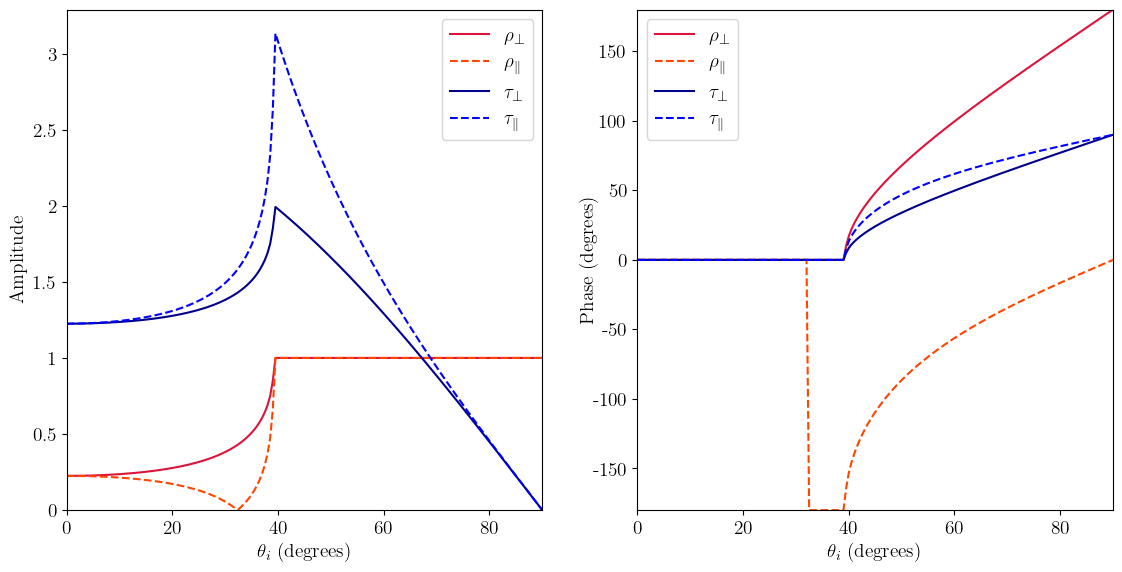

In [8]:
fresnel_plotter(1e8, 2.5, 1, 0, 1, 1, 0)

Define function to plot attenuation and wavevectors.

In [10]:
def vector_plotter(f, theta_i, kappa_e1, kappa_m1, sigma_1, kappa_e2, kappa_m2, sigma_2):
    
    # determine the angle of transmission
    n_1, theta_i, phi_i, n_2, theta_t, phi_t = __angle_of_transmission(f, theta_i, kappa_e1, kappa_m1, sigma_1, kappa_e2, kappa_m2, sigma_2)
    
        # set up latex labels on plot (optional)
    try:
        rc('text', usetex=True) # can try usetex=False
        rc('font', size=14)
        rc('legend', fontsize=14)
        rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    except:
        pass

    # create figure
    fig, ax = plt.subplots(figsize=(7, 7))
    
    # set axis labels and limits
    ax.set_xlabel(r'$z$ (m)')
    ax.set_ylabel(r'$x$ (m)')
    ax.set_aspect('equal')
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.set_xlim([-1.2,1.2])
    ax.set_ylim([-1.2,1.2])
    ax.axhline(y=0, color='black')
    ax.axvline(x=0, color='grey', linewidth=1)

    # plot incident, reflected and transmitted vectors
    ax.arrow(-np.cos(theta_i), -np.sin(theta_i), 0.5*np.cos(theta_i), 0.5*np.sin(theta_i), color='r', width=0.002, head_width=0.02)
    ax.arrow(-np.cos(np.pi/2 - phi_i), -np.sin(np.pi/2 - phi_i), 0.5*np.cos(np.pi/2 - phi_i), 0.5*np.sin(np.pi/2 - phi_i), color='b', width=0.002, head_width=0.02, linestyle='dotted')

    ax.arrow(-0.5*np.cos(theta_i), 0.5*np.sin(theta_i), -0.5*np.cos(theta_i), 0.5*np.sin(theta_i), color='r', width=0.002, head_width=0.02)
    ax.arrow(-0.5*np.cos(np.pi/2 - phi_i), 0.5*np.sin(np.pi/2 - phi_i), -0.5*np.cos(np.pi/2 - phi_i), 0.5*np.sin(np.pi/2 - phi_i), color='b', width=0.002, head_width=0.02, linestyle='dotted')

    ax.arrow(0.5*np.cos(theta_t), 0.5*np.sin(theta_t), 0.5*np.cos(theta_t), 0.5*np.sin(theta_t), color='r', width=0.002, head_width=0.02)
    ax.arrow(0.5*np.cos(np.pi/2 - phi_t), 0.5*np.sin(np.pi/2 - phi_t), 0.5*np.cos(np.pi/2 - phi_t), 0.5*np.sin(np.pi/2 - phi_t), color='b', width=0.002, head_width=0.02, linestyle='dotted')

    plt.show()
    
    return theta_i, phi_i, theta_t, phi_t

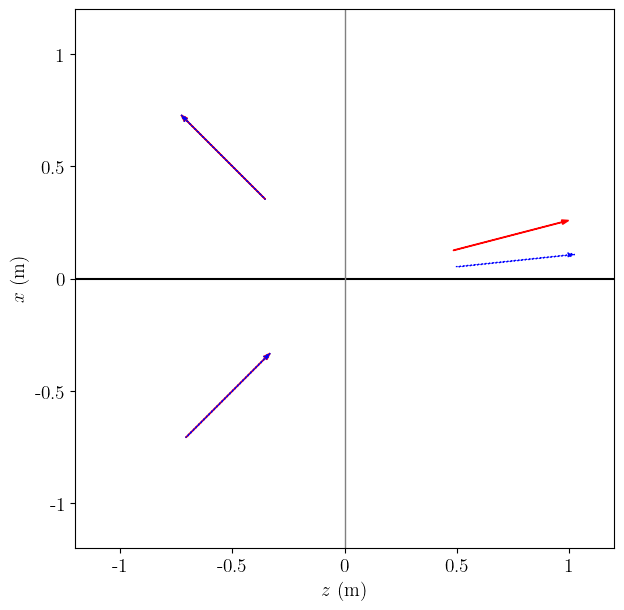

(0.7853981633974483,
 0.7853981633974483,
 0.2542886441201311,
 1.4658549216820185)

In [14]:
vector_plotter(1e8, np.pi/4, 10 - 10j, 1, 0, 1 - 10j, 1, 1)

Define functions to plot heat map of amplitude of electric field component perpendicular to plane of incidence in a region around the region at a given time step.

In [ ]:
def interface_plotter(f, t, theta_i, kappa_e1, kappa_m1, sigma_1, kappa_e2, kappa_m2, sigma_2):
    # find the refractive indicies and direction of propagation and attenuation
    n_1, _, phi_i, n_2, theta_t, phi_t = __angle_of_transmission(f, theta_i, kappa_e1, kappa_m1, sigma_1, \
                        kappa_e2, kappa_m2, sigma_2)
    # find the reflection and transmission coefficients
    rho_perp, rho_para, tau_perp, tau_para = fresnel_coefficients(f, theta_i, kappa_e1, kappa_m1, sigma_1, \
                        kappa_e2, kappa_m2, sigma_2)
    
    # evaulate the wave equation across a grid centred on the origin
    X, Z, E = __electric_field_perp(f, t, n_1, theta_i, phi_i, n_2, theta_t, phi_t, rho_perp, tau_perp)

    # set up latex labels on plot (optional)
    try:
        rc('text', usetex=True) # can try usetex=False
        rc('font', size=14)
        rc('legend', fontsize=14)
        rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    except:
        pass

    # create figure
    fig, ax = plt.subplots(figsize=(7, 7))
    
    # set axis labels and limits
    ax.set_xlabel(r'$z$ (m)')
    ax.set_ylabel(r'$x$ (m)')
    ax.set_aspect('equal')
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

    # plot heat map
    ax.pcolor(Z, X, E.real, shading='nearest', cmap='viridis', vmin=-1, vmax=1)
    
    plt.show()
    
def __electric_field_perp(f, t, n_1, theta_i, phi_i, n_2, theta_t, phi_t, rho_perp, tau_perp):
    # define grid in the xz-plane (based on wavelength in medium 1)
    wavelength = c/(n_1.real*f)
    x = np.linspace(-3*wavelength, 3*wavelength, 512, endpoint=True)
    z = x.copy()
    X, Z = np.meshgrid(x, z)
    
    # create grid for electric field values
    E = np.zeros_like(X).astype(complex)
    
    # evaluate incident + reflected wave equation for medium 1 (z < 0)
    k = 2*np.pi*f/c
    E[Z <= 0] = np.exp(n_1.imag*k*np.cos(phi_i)*X[Z <= 0] + n_1.imag*k*np.sin(phi_i)*Z[Z <= 0])* \
                    np.exp(1j*(2*np.pi*f*t - n_1.real*k*np.sin(theta_i)*X[Z <= 0] - n_1.real*k*np.cos(theta_i)*Z[Z <= 0])) + \
                rho_perp[0]*np.exp(1j*rho_perp[1])* \
                    np.exp(n_1.imag*k*np.cos(phi_i)*X[Z <= 0] + n_1.imag*k*np.sin(phi_i)*Z[Z <= 0])* \
                    np.exp(1j*(2*np.pi*f*t - n_1.real*k*np.sin(theta_i)*X[Z <= 0] + n_1.real*k*np.cos(theta_i)*Z[Z <= 0]))
            # for a homogeneous medium, np.exp(-alpha*np.sin(theta_i)*X[Z <= 0] - alpha*np.cos(theta_i)*Z[Z <= 0]) ...

    # evaluate transmitted wave equation for medium 2 (z > 0)
    if n_1.real*np.sin(theta_i)/n_2.real < 1:
        E[Z > 0] = (tau_perp[0]*np.exp(1j*tau_perp[1])* \
                    np.exp(n_2.imag*k*np.cos(phi_t)*X[Z > 0] + n_2.imag*k*np.sin(phi_t)*Z[Z > 0])* \
                    np.exp(1j*(2*np.pi*f*t - n_2.real*k*np.sin(theta_t)*X[Z > 0] - n_2.real*k*np.cos(theta_t)*Z[Z > 0])))
    else:
        E[Z > 0] = (tau_perp[0]*np.exp(1j*tau_perp[1])* \
                    np.exp(n_2.imag*k*np.cos(phi_t)*X[Z > 0] + n_2.imag*k*np.sin(phi_t)*Z[Z > 0] - \
                    n_2.real*k*np.sqrt((n_1.real*np.sin(theta_i)/n_2.real)**2 - 1)*Z[Z > 0])* \
                    np.exp(1j*(2*np.pi*f*t - n_1.real*k*np.sin(theta_i)*X[Z > 0])))
    
    return X, Z, E

In [ ]:
interface_plotter(1e8, 0, np.pi/4, 1, 1, 0, 1-2j, 1, 0)

In [ ]:
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from matplotlib.collections import PolyCollection

def interface_animation(f, theta_i, kappa_e1, kappa_m1, sigma_1, kappa_e2, kappa_m2, sigma_2):    
    # define set of time based on period of wave
    t = np.linspace(0, 1./f, 30)
    
    # find the refractive indicies and direction of propagation and attenuation
    n_1, _, phi_i, n_2, theta_t, phi_t = __angle_of_transmission(f, theta_i, kappa_e1, kappa_m1, sigma_1, \
                        kappa_e2, kappa_m2, sigma_2)
    # find the reflection and transmission coefficients
    rho_perp, rho_para, tau_perp, tau_para = fresnel_coefficients(f, theta_i, kappa_e1, kappa_m1, sigma_1, \
                        kappa_e2, kappa_m2, sigma_2)
    
    # evaulate the wave equation across a grid centred on the origin
    X_list, Z_list, E_list = [], [], []
    for i in range(0, len(t)):
        X, Z, E = __electric_field_perp(f, t[i], n_1, theta_i, phi_i, n_2, theta_t, phi_t, rho_perp, tau_perp)
        X_list.append(X)
        Z_list.append(Z)
        E_list.append(E)

    # set up latex labels on plot (optional)
    try:
        rc('text', usetex=True) # can try usetex=False
        rc('font', size=14)
        rc('legend', fontsize=14)
        rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    except:
        pass

    # create figure
    fig, ax = plt.subplots(figsize=(7, 7))
    
    # set axis labels and limits
    ax.set_xlabel(r'$z$ (m)')
    ax.set_ylabel(r'$x$ (m)')
    ax.set_aspect('equal')
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

    # add text label
    text = ax.text(0.95*np.max(Z_list[0]), -0.95**np.max(X_list[0]), r'$t = $ '+'{:.3g}'.format(t[0])+' s', ha='right')

    # create animation
    anim = FuncAnimation(fig, __animate_frame, frames=len(t), interval=1./len(t), \
                         blit=True, fargs=(ax, X_list, Z_list, E_list, t, text))
    plt.close()
    
    return anim

def __animate_frame(i, ax, X_list, Z_list, E_list, t, text):
    # remove previous heat map for efficiency 
    for child in ax.get_children():
        if isinstance(child, PolyCollection):
            child.remove()

    # add heat map to plot
    ax.pcolor(Z_list[i], X_list[i], E_list[i].real, shading='nearest', cmap='viridis', vmin=-1, vmax=1)
    
    text.set_text(r'$t = $ '+'{:.3g}'.format(t[i])+'\,s')
    
    return text,

In [ ]:
anim = interface_animation(1e9, np.pi/3, 2.25, 1, 0, 2.25-1j, 1, 0)

In [ ]:
f = "interface.html"
writervideo = animation.HTMLWriter(fps=30)
anim.save(f, writer=writervideo, dpi=100)